In [3]:
import cv2
import numpy as np
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline  

from heatmap_estimator import HeatmapEstimator
from projection_dataset import ProjectionDataset
%load_ext autoreload
%autoreload 2

In [4]:
dataset_dir = "../data/projections"
plane = "XY" # Other planes: YZ and ZX
model_path = "../models/" + plane + ".pth"

In [5]:
train_subjects = ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8"]
train_gestures = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "I", "IP", "L", "MP", "RP", "T", "TIP", "Y"]
train_dataset = ProjectionDataset(dataset_dir, train_subjects, train_gestures, plane)
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)

In [6]:
val_subjects = ["P0"]
val_gestures = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "I", "IP", "L", "MP", "RP", "T", "TIP", "Y"]
val_dataset = ProjectionDataset(dataset_dir, val_subjects, val_gestures, plane)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False)

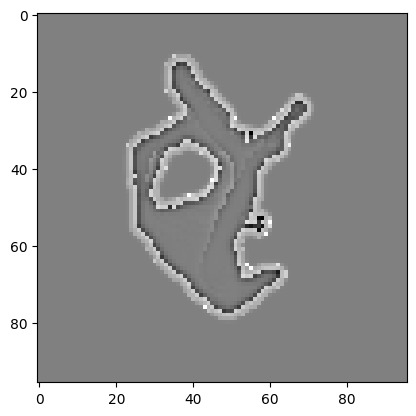

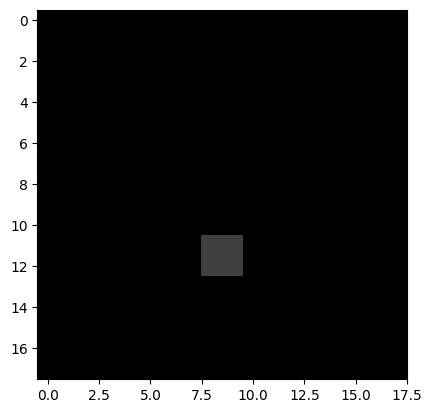

In [7]:
# Visualize sample
image, heatmap_gt = next(iter(train_dataloader))

plt.imshow(torch.squeeze(image[0], 0).numpy(), cmap='gray', vmin=-1, vmax=1)
plt.show()

plt.imshow(torch.squeeze(heatmap_gt[0][0], 0).numpy(), cmap='gray', vmin=0, vmax=1)
plt.show()

In [8]:
# Load the model
device = 'cuda'
model = HeatmapEstimator().to(device)

In [9]:
# Configure the optimizer and criterion
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, weight_decay=0.0005)
criterion = torch.nn.MSELoss()

In [10]:
# Main training loop
epochs = 50
train_loss_over_epochs = []
val_loss_over_epochs = []
for epoch in range(epochs):
    print("Computing epoch", epoch)
    minibatch = 0

    train_loss = 0
    for lcn, heatmaps in train_dataloader:    
        optimizer.zero_grad()
        
        lcn = lcn.type(torch.FloatTensor).to(device)
        lcn = torch.unsqueeze(lcn, dim=1)
        pred = model(lcn)
        
        heatmaps = heatmaps.type(torch.FloatTensor).to(device)
        loss = criterion(pred, heatmaps)
        
        loss.backward()
        optimizer.step()
        
        if (minibatch % 50 == 0):
            print("Minibatch {} Loss = {:.8f}".format(minibatch, loss.item()))
        minibatch += 1    
            
        train_loss += loss.cpu().item()
    train_loss /= len(train_dataloader)
    train_loss_over_epochs.append(train_loss)     
    
    val_loss = 0
    model.eval()
    with torch.no_grad():
        for lcn, heatmaps in val_dataloader:
            lcn = lcn.type(torch.FloatTensor).to(device)
            lcn = torch.unsqueeze(lcn, dim=1)
            pred = model(lcn)

            heatmaps = heatmaps.type(torch.FloatTensor).to(device)
            loss = criterion(pred, heatmaps)
            val_loss += loss.cpu().item()
    val_loss /= len(val_dataloader)
    val_loss_over_epochs.append(val_loss)
    
    if (epoch + 1 % 10 == 0):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    
    print("Epoch {}: Training Loss = {:.8f}, Validation Loss = {:.8f}".format(epoch, train_loss, val_loss))

Computing epoch 0
Minibatch 0 Loss = 0.00119039
Minibatch 50 Loss = 0.00115044
Minibatch 100 Loss = 0.00110433
Minibatch 150 Loss = 0.00109951
Minibatch 200 Loss = 0.00108370
Minibatch 250 Loss = 0.00106135
Epoch 0: Training Loss = 0.00111262, Validation Loss = 0.00106145
Computing epoch 1
Minibatch 0 Loss = 0.00105524
Minibatch 50 Loss = 0.00104147
Minibatch 100 Loss = 0.00102749
Minibatch 150 Loss = 0.00100885
Minibatch 200 Loss = 0.00100119
Minibatch 250 Loss = 0.00099503
Epoch 1: Training Loss = 0.00101727, Validation Loss = 0.00098891
Computing epoch 2
Minibatch 0 Loss = 0.00098990
Minibatch 50 Loss = 0.00097126
Minibatch 100 Loss = 0.00097265
Minibatch 150 Loss = 0.00095656
Minibatch 200 Loss = 0.00094977
Minibatch 250 Loss = 0.00094578
Epoch 2: Training Loss = 0.00096175, Validation Loss = 0.00094364
Computing epoch 3
Minibatch 0 Loss = 0.00093887
Minibatch 50 Loss = 0.00093742
Minibatch 100 Loss = 0.00093202
Minibatch 150 Loss = 0.00092660
Minibatch 200 Loss = 0.00091990
Miniba

Minibatch 0 Loss = 0.00077774
Minibatch 50 Loss = 0.00077924
Minibatch 100 Loss = 0.00078000
Minibatch 150 Loss = 0.00077695
Minibatch 200 Loss = 0.00077556
Minibatch 250 Loss = 0.00077513
Epoch 30: Training Loss = 0.00077637, Validation Loss = 0.00077315
Computing epoch 31
Minibatch 0 Loss = 0.00077571
Minibatch 50 Loss = 0.00077528
Minibatch 100 Loss = 0.00077616
Minibatch 150 Loss = 0.00077721
Minibatch 200 Loss = 0.00077490
Minibatch 250 Loss = 0.00077346
Epoch 31: Training Loss = 0.00077521, Validation Loss = 0.00077203
Computing epoch 32
Minibatch 0 Loss = 0.00077553
Minibatch 50 Loss = 0.00077527
Minibatch 100 Loss = 0.00077450
Minibatch 150 Loss = 0.00077447
Minibatch 200 Loss = 0.00077429
Minibatch 250 Loss = 0.00077250
Epoch 32: Training Loss = 0.00077416, Validation Loss = 0.00077097
Computing epoch 33
Minibatch 0 Loss = 0.00077543
Minibatch 50 Loss = 0.00077572
Minibatch 100 Loss = 0.00076897
Minibatch 150 Loss = 0.00077149
Minibatch 200 Loss = 0.00077140
Minibatch 250 Loss

In [ ]:
# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.ylabel('Loss')
plt.plot(np.arange(epochs), train_loss_over_epochs, color='red', label='train')
plt.plot(np.arange(epochs), val_loss_over_epochs, color='blue', label='val')
plt.title('Loss per Epoch')
plt.xticks(np.arange(epochs, dtype=int))
plt.grid(True)
plt.legend()
plt.show()

In [2]:
torch.save(model.state_dict(), model_path)

NameError: name 'torch' is not defined

## Evaluation

In [14]:
model = HeatmapEstimator()
model.load_state_dict(torch.load(model_path))
model = model.to(device)

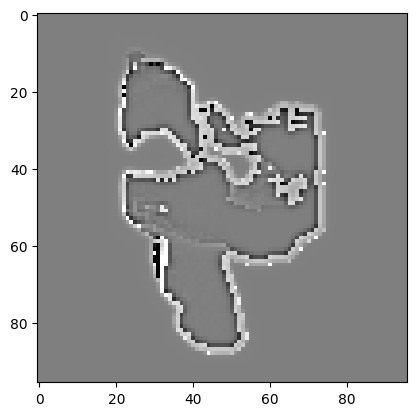

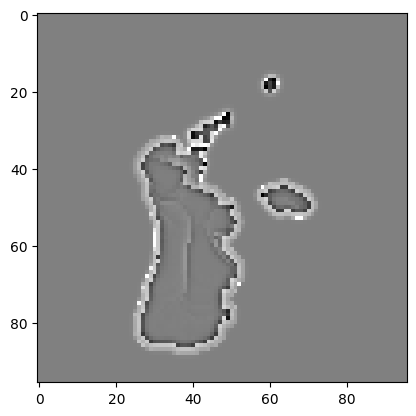

In [15]:
# Visualize sample
image, heatmap_gt = next(iter(val_dataloader))

plt.imshow(torch.squeeze(image[0], 0).numpy(), cmap='gray', vmin=-1, vmax=1)
plt.show()

plt.imshow(torch.squeeze(image[100], 0).numpy(), cmap='gray', vmin=-1, vmax=1)
plt.show()

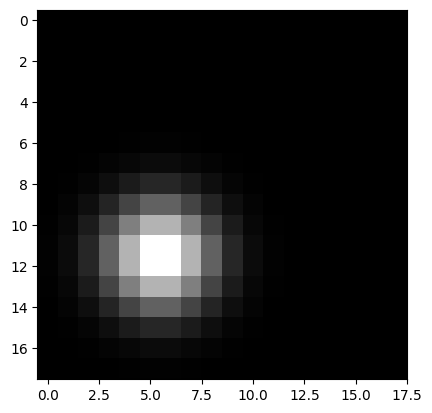

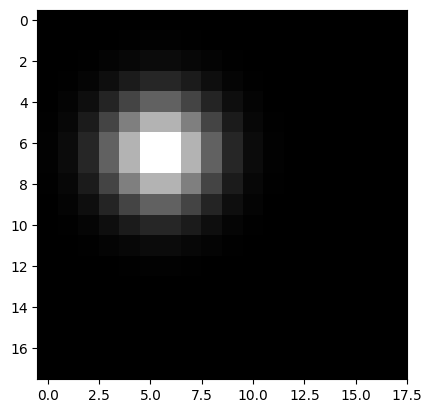

In [16]:
plt.imshow(torch.squeeze(heatmap_gt[0][2], 0).numpy(), cmap='gray', vmin=0, vmax=1)
plt.show()

plt.imshow(torch.squeeze(heatmap_gt[100][2], 0).numpy(), cmap='gray', vmin=0, vmax=1)
plt.show()

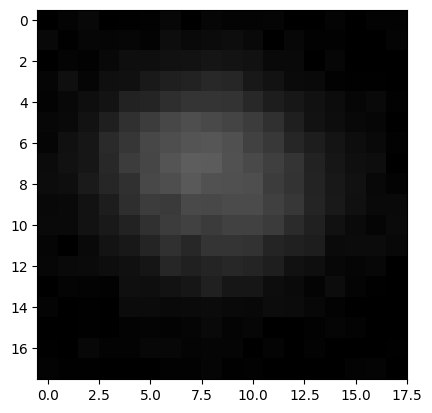

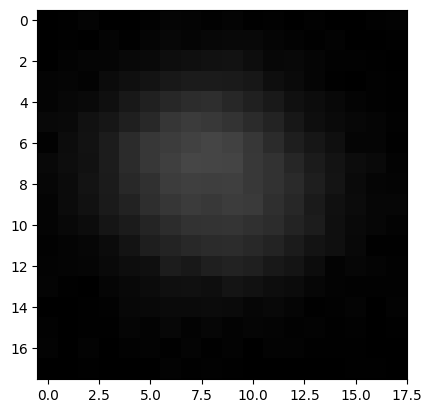

In [17]:
image = torch.unsqueeze(image.type(torch.FloatTensor).to(device), dim=1)
model.eval()
with torch.no_grad():
    pred = model(image)
    plt.imshow(pred[0][2].cpu().numpy(), cmap='gray', vmin=0, vmax=1)
    plt.show()
    
    plt.imshow(pred[100][2].cpu().numpy(), cmap='gray', vmin=0, vmax=1)
    plt.show()